데이터분석에서의 미적분은 **최적화**를 위해 사용된다.

미적분을 이야기 하기 전에 먼저 이전에 학습했던 **최소자승문제**를 다시 살펴보자.

최소자승문제(least square)에서 $x \rightarrow y$ 함수를 만들기 위해 다음의 선형함수를 만들게 된다.

$y = w^Tx$

이 함수는 다음의 선형조합으로 표현된다.

\begin{align}
\hat{y} = w_1 x_1 +  w_2 x_2 + \ldots +  w_N x_N  = w^T x 
\end{align}

위 식을 통해 예측값 $\hat{y}$을 도출할 수 있으며 예측값과 실제값이 최대한 유사한지를 파악하기 위해 오차(error)를 계산한다.

$$e = (y-\hat{y})^2$$

즉, 선형회귀 모형을 찾는다는 말의 의미는 위의 선형조합에서 사용되는 $w$벡터를 찾는 것을 의미한다.

보스턴 주택가격 데이터를 이용해 최소자승문제를 적용해보자.

In [84]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
A = X[:4,[0,4,5,6]] # CRIM, NOX, RM, AGE
b = y[:4]

# 특징행렬과 타겟값(y)
A, b

(array([[6.320e-03, 5.380e-01, 6.575e+00, 6.520e+01],
        [2.731e-02, 4.690e-01, 6.421e+00, 7.890e+01],
        [2.729e-02, 4.690e-01, 7.185e+00, 6.110e+01],
        [3.237e-02, 4.580e-01, 6.998e+00, 4.580e+01]]),
 array([24. , 21.6, 34.7, 33.4]))

In [85]:
# 최소자승문제를 이용해 w 벡터를 구함

w, resid, rank, s = np.linalg.lstsq(A, b)

w

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([-3.12710043e+02, -1.15193942e+02,  1.44996465e+01, -1.13259317e-01])

In [91]:
# 선형조합식을 적용해 y1을 예측

y1 = w[0]*A[0,0] + w[1]*A[0,1] + w[2]*A[0,2] + w[3]*A[0,3]

In [98]:
# y, y_hat을 비교

b[0], y1

(24.0, 24.000000000000213)

위의 예시에서는 numpy를 이용해 최소자승문제를 풀었지만 이를 공식으로 나타내면 다음과 같다.

$$w = (X^TX)^{-1}X^Ty$$

In [105]:
np.linalg.inv(A.T@A) @ A.T @ b

array([-3.12710043e+02, -1.15193942e+02,  1.44996465e+01, -1.13259317e-01])

In [101]:
w

array([-3.12710043e+02, -1.15193942e+02,  1.44996465e+01, -1.13259317e-01])

그렇다면 이 $w$는 어떤 원리로 찾을 수 있는 것일까?

먼저 최적의 모수$w$를 모른다는 가정하에 임의의 $w$를 선택해 $e$를 계산해보자.

$w$를 1로 설정했을 때 $e$값이 10, $w$가 2일 때 $e$는 5, $w$가 3일 때 $e$는 12인 경우 다음과 같은 그래프가 그려진다.

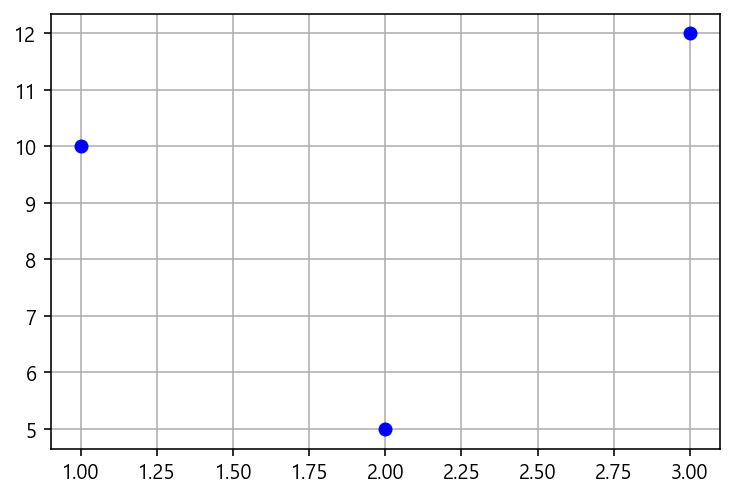

In [113]:
x = [1, 2, 3]
loss = [10, 5, 12]
plt.plot(x, loss, 'bo')
plt.grid()

그렇다면 위 그래프에서 최적의 모수는 바로 2인 것이다.

이처럼 모수$w$를 입력받아 오차의 크기를 출력하는 함수를 손실함수, 비용함수, 오차함수라 한다.

반대로 성능을 측정하는 함수는 성능함수라 한다.

이러한 함수들을 통틀어 목적함수라 한다.

**이처럼 어떤 모수에 대해 성능/손실함수를 가장 크게 혹은 작게 만들어 주는 작업을 최적화라 한다.**

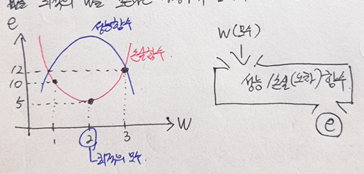

그렇다면 문제는 의외로 쉬워질 수 있다.

최적화를 위해선 그래프를 그리고 그 최저점을 찾으면 된다.

하지만 이 문제는 현실적으로 어려운 부분들이 존재한다.

그래프에 하나의 점을 찍기 위해선 다음의 작업들이 필요하다.

1. 임의의 모수를 정한다.
2. 모든 데이터 $x_1 ... x_N$에 대해 선형조합을 계산한다. $x$가 10000개라면 10000개의 $x, w$가 조합된다.
3. 임의의 모수를 통한 선형조합식으로 예측값 $\hat{y}$를 도출하고 이를 실제 $y$값과 비교해 $e$를 계산한다.
4. $e^2$을 계산하면 점 하나를 찍을 수 있다.

그런데 만약 가지고 있는 데이터가 1차원에서 점 100개를 찍으면 3차원 공간에서는 (100 * 100 * 100) = 100만번을 반복해야한다.

이렇기 때문에 현실적으로 이러한 방식으로 점을 찍는 것은 불가능하다. 따라서 **미분을 이용한다.**

미분이란 손실함수에 모수(입력값)이 미세하게 바뀔 때 출력값(성능 or 손실)이 작아지는지 커지는지를 알아내는 것이다.

즉, 모수를 약간 증가시켰는데 성능에 대한 출력값이 높아지면 모수를 증가시킨 방향으로 이동하면되고 반대의 경우는 모수를 감소시키면 된다.

## 기울기

수치적 최적화는 가장 적은 횟수로 여러 $x$값을 시도하여 최적의 값을 찾는 방법이다.

따라서 어떤 값 $x_1$을 시도한 후 다음 번에 다른 $x_2$값을 지정하기 위해선 어떤 값이 더 좋을지를 알아야 한다.

여기서 앞서 설명한 미분을 이용하면 $x_1$위치에서 $x$가 증가했을 때 $y$가 증가한다면 $x_2$는 $x_1$보다 큰 값을 사용하는 것이 합리적일 것이다.

이와 같은 정보를 바로 **기울기(slope) 혹은 민감도(sensitivity)**라고 한다.

만약 입력변수의 값이 $x$에서 $x_2$로 $\Delta x = x_2-x$만큼 달라졌다고 가정한다면 출력 변수 $f(x)$라는 값에서 $f(x_2)$라는 값으로 $\Delta y = f(x_2) - f(x)$만큼 달라질 것이다.

이 비율을 수식으로 나타내면 다음과 같다.

\begin{align}
\dfrac{\Delta y}{\Delta x} = \dfrac{f(x_2) - f(x)}{x_2 - x} = \dfrac{f(x + \Delta x) - f(x)}{\Delta x} 
\end{align}

이미 중, 고등학교 과정에서 배운 기울기는 ($y$변화량 / $x$변화량)으로 알고 있을 것이다. 실제 이 공식과 같은 말이다.

즉, 기울기는 $x$를 얼마나 변화시켰는지에 대한 $y$의 변화량으로 $\Delta x$에 대한 반응이다.

그런데 위 방식으로 기울기를 구하는 경우 다음과 같은 문제가 발생한다.

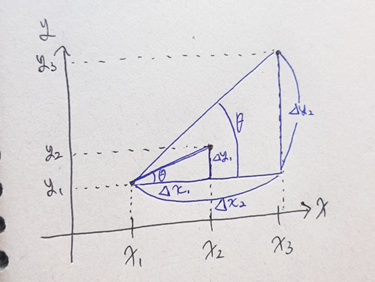

최초 $x_1$에서 $x_2$로 모수를 변화시켰을 때의 기울기와 $x_1$에서 $x_3$로 모수를 변화시켰을 때의 기울기가 서로 다르다는 것이다.

이러한 문제로 인해 $\Delta x$를 무엇으로 설정하냐에 따라 기울기가 달라질 수 있기 때문에 다음의 방식을 이용한다.

**가능한 한 $\Delta x$가 작은 경우로 통일하는 것이다.**

이를 수학적인 용어로 극한이라고 한다.

\begin{align}
\text{slope} = \lim_{\Delta x \rightarrow 0} \dfrac{f(x + \Delta x) - f(x)}{\Delta x} 
\end{align}

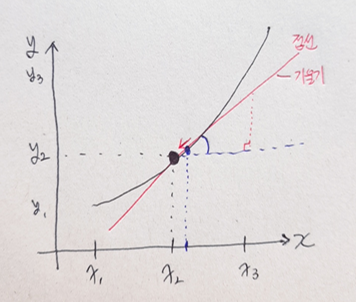

위 그래프에서 모수 $x_2$에서 기울기를 구하기 위해 $x_2$를 아주 조금 변화시키면 $y_2$도 아주 조금 변하면서 두개의 점이 생기게 된다.

이 두 점의 각도를 이용해 기울기를 도출할 수 있다.

그런데 $\Delta x$를 최대한 작게 만드는 것으로 조건을 두었으니 이 두 점의 사이 구간을 아주 작게 만들면 결국 하나의 점이 되면서 **접선(tangent)가 된다. 이 접선에 대해 (높이/접선의 밑변) 를 구하면 이것이 바로 기울기**가 된다.

`예제`

다음과 같은 3차 함수에서 기울기를 구하면 어떻게 될까?

$$x^3 - 3x^2 + x$$

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


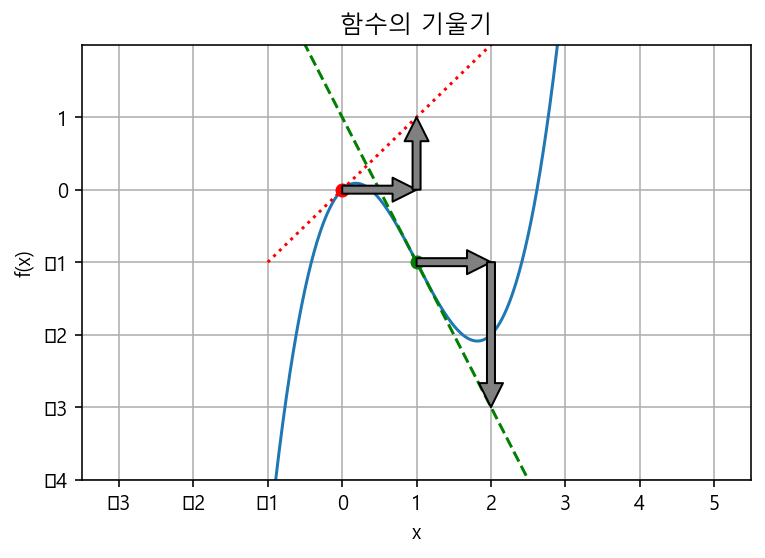

In [116]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.grid()
plt.show()

위 그래프에서 $x$가 0일 때의 접선을 구하면 $x$가 1 이동했을 때 $y$도 1 이동하므로 기울기는 1이다.

\begin{align}
x=0 \;\;\rightarrow\;\; \text{slope} = \dfrac{1}{1} = 1
\end{align}

$x$가 1일 때 접선을 구하면 $x$가 1 이동했을 때 $y$는 -2만큼 이동하므로 기울기는 -2가 된다.

\begin{align}
x=1 \;\;\rightarrow\;\; \text{slope} = \dfrac{-2}{1} = -2
\end{align}

## 수치미분

scipy.misc 패키지의 derivative() 함수를 이용해 대략적인 기울기를 계산할 수 있다.

인수로는 함수 f, 기울기를 구할 위치 x, 기울기를 구하기 위해 이동할 거리 dx를 받는다.

\begin{align}
\text{slope} \approx \dfrac{f\left(x + \dfrac{1}{2}dx\right) - f\left(x - \dfrac{1}{2}dx\right)}{dx} 
\end{align}

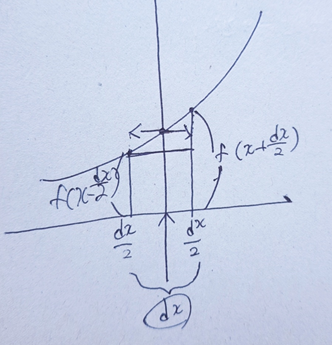

수치 미분은 대력적인 기울기를 구할 뿐, 정확한 값을 구할 수 없다는 점을 기억하자.

derivative() 명령을 이용할 때 세번째 인수로 입력되는 기울기를 구하기 위해 이동할 거리 `dx`는 작을수록 좋다. 하지만 너무 작을 경우 부동소수점, 오버(언더)플로우 오류로 인해 오차가 증폭될 수 있다.

In [17]:
from scipy.misc import derivative

# 3차 다항식
def f(x):
    return x**3 - 3 * x**2 + x

# 기울기를 x = 0, x = 1 지점에서 수치미분한 결과
# dx = 100만분의 1

print(derivative(f, 0, dx=1e-6))
print(derivative(f, 1, dx=1e-6))

1.000000000001
-2.000000000002


## 미분

`미분(differentiation)`은 어떤 함수로부터 그 함수의 기울기를 출력하는 새로운 함수를 만들어내는 작업이다.

이렇게 미분으로 만들어진 함수는 원래 함수의 도함수라 한다.

\begin{align}
f' = \dfrac{d}{dx}(f) = \dfrac{d}{dx}f = \dfrac{df}{dx}  = \dfrac{d}{dx}(y) = \dfrac{d}{dx}y = \dfrac{dy}{dx} 
\end{align}

앞서 사용했던 함수를 미분한 도함수를 만들어 두 함수에 대한 출력 결과를 살펴보자.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


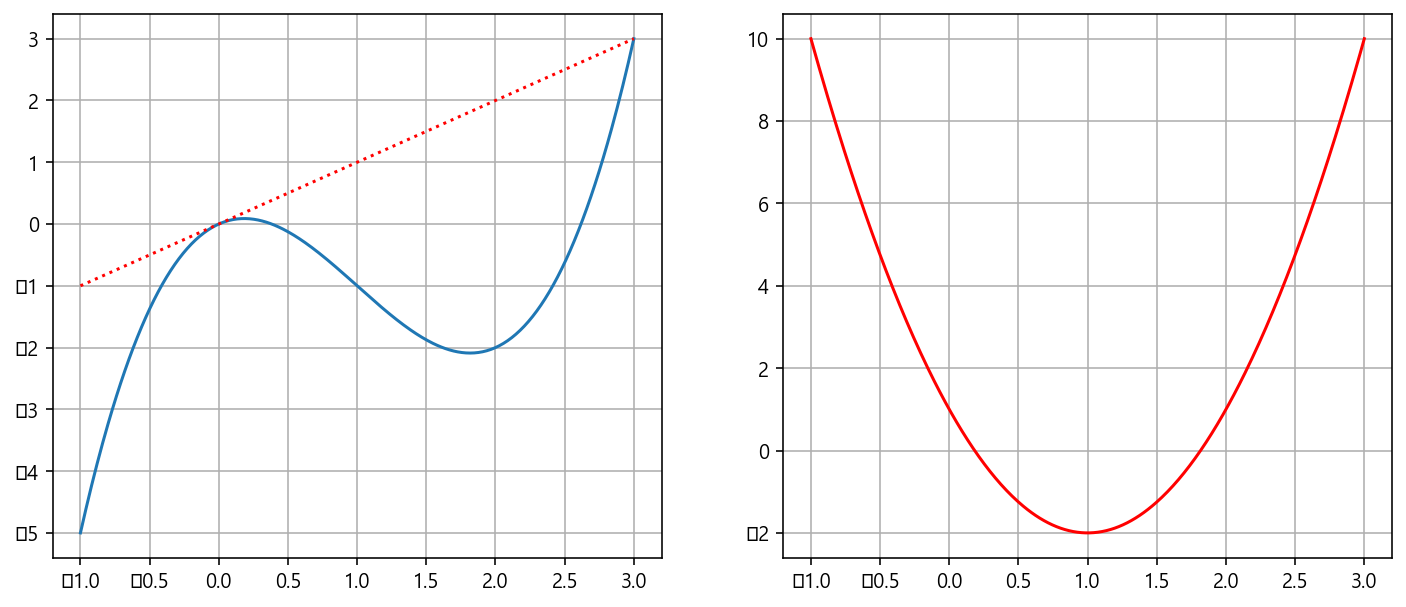

In [34]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

def f_prime(x):
    return 3*x**2 -6 * x + 1

x2 = np.linspace(-1, 3, 400)
y2 = f_prime(x2)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(x, y)
plt.plot(x, x, 'r:')
plt.grid()
plt.subplot(122)
plt.grid()
plt.plot(x2, y2, color='r')

왼쪽의 그래프에서 x = 0일 때 대략적인 접선을 그어 기울기를 구하면 x가 1 변할 때 y가 1 변하므로 기울기는 1이다. 

오른쪽 도함수 그래프에서 x = 0일 때 y값은 1에 해당하므로 원래의 함수의 기울기를 구해주는 것이 도함수임을 알 수 있다.

## 미분가능

어떤 함수는 특정한 지점에 대해 기울기를 정의하기 어려운 경우가 있다. 예를 들어 `ReLU`함수의 경우 $x<0$ 구간에서 기울기는 0이기 때문에 미분이 불가능하다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


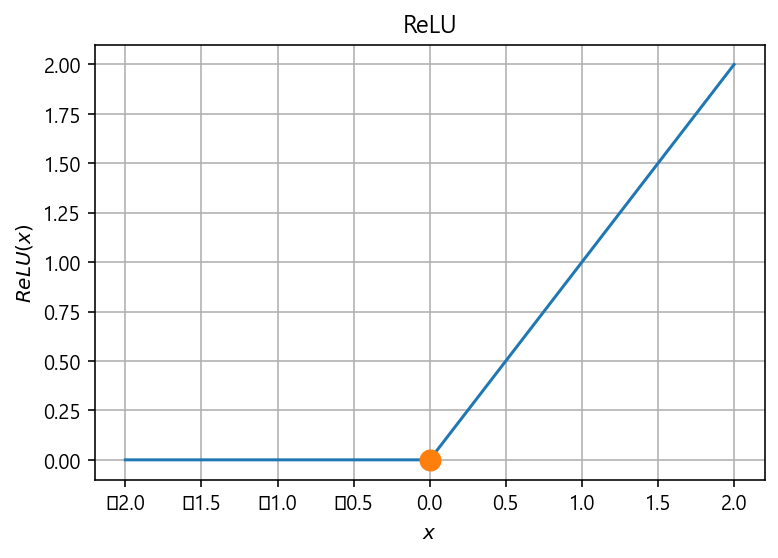

In [36]:
def relu(x):
    return np.where(x > 0, x, 0)


xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker='o', ms=10)
plt.title("ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.grid()
plt.show()

## 예제

In [ ]:
# 함수와 도함수의 비교

\begin{align}
f(x) = x^3 - 3x^2 + x
\end{align}

\begin{align}
f'(x) = 3x^2 - 6x + 1
\end{align}

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


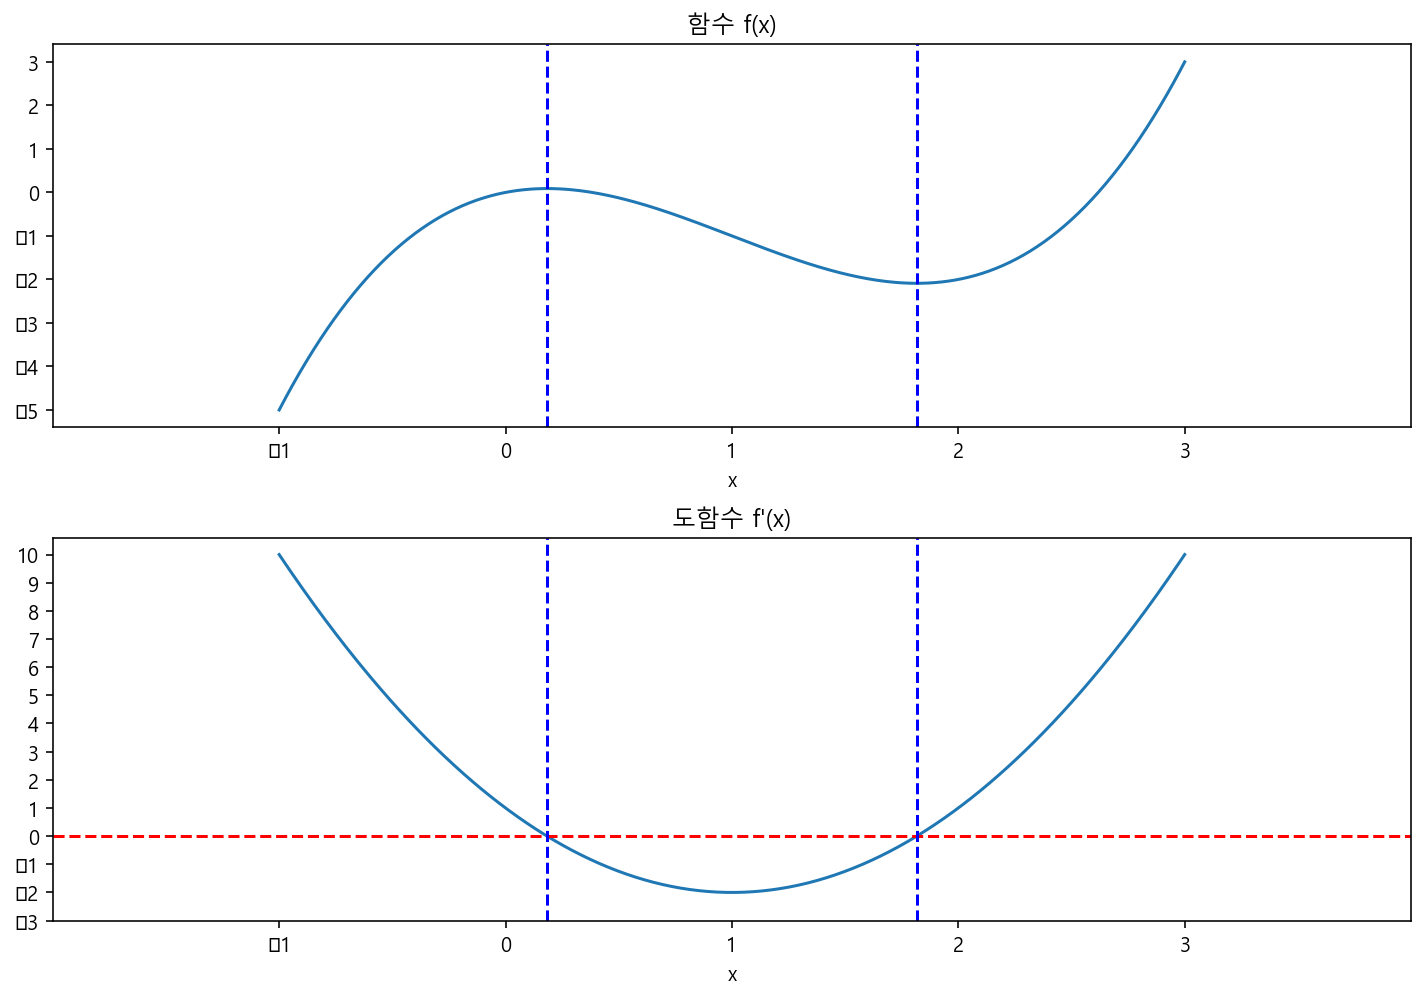

In [37]:
def fprime(x):
    return 3 * x ** 2 - 6 * x + 1

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.title('함수 f(x)')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title("도함수 f'(x)")
plt.axhline(0, c="r", ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.tight_layout()
plt.show()

## 곱셉법칙

어떤 함수의 형태가 두 함수를 곱한 것과 같을 때 두 함수의 도함수를 사용해 원래 함수의 도함수를 구할 수 있다. 이를 **곱셈법칙**이라 한다.

\begin{align}
\dfrac{d}{dx}\big( f  \cdot g \big) = f \cdot  \dfrac{dg}{dx} + \dfrac{df}{dx} \cdot g 
\end{align}

예시

f = $(2x-3)(x^2-4x+5)$

일 때, 곱셈법칙을 적용하면 다음과 같이 계산된다.

$= 2(x^2-4x+5) + (2x-3)(2x-4)$

쉽게 생각하면 앞의 항을 미분한 값과 뒤의 항을 그대로 곱한결과 1, 앞의 항을 그대로 두고 뒤의 항을 미분한 값을 곱한 결과 2 를 더하는 것이다.

예제

$f = xe^x$

도함수를 구하면 다음과 같다.

$f = x(e^x)$가 되므로

$1 * e^x + x * xe = e^x + xe^x$가 된다.

## 연쇄법칙

**연쇄법칙(chain rule)**은 미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우에 적용할 수 있다.

\begin{align}
f(x) = h(g(x))
\end{align}

즉, 위의 함수 $f$의 출력값은 $g$라는 함수의 출력값이 다시 $h$라는 함수이 입력되어 출력된 값이다.

이를 그림으로 표현해보면 다음과 같다.

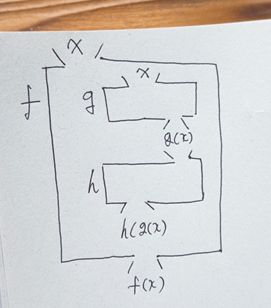

이러한 경우의 도함수는 다음과 같이 구할 수 있다.

\begin{align}
\dfrac{df}{dx} = \dfrac{dh}{dg} \cdot \dfrac{dg}{dx}
\end{align}

수식을 보면 알 수 있듯이 $x$에 대한 $f$의 미분 결과는 $g, h$함수의 기울기를 모두 곱한 값이 된다.

예제

다음의 식을 chain rule을 이용해 미분하면 다음과 같다.

\begin{align}
f = \exp \dfrac{(x-\mu)^2}{\sigma^2}
\end{align}

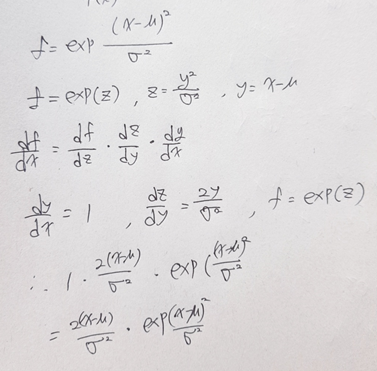

**로그함수에 연쇄법칙을 적용하면 다음과 같은 특별한 규칙이 생긴다.**

\begin{align}
\dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} 
\end{align}

## 연습문제

다음 세 함수를 미분

\begin{align}
f(x) = x^3 - 1
\end{align}

\begin{align}
f(x) = \log (x^{2}-3k)
\end{align}

\begin{align}
f(x) =\exp({ax^b})
\end{align}

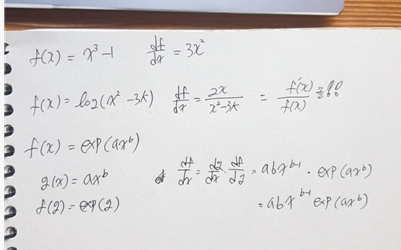

## 2차 도함수

어떤 도함수를 한 번 더 미분하면 이를 **2차 도함수**라고 한다.

2차 도함수는 2개의 프라임기호('')를 붙이거나 $\dfrac{d^2}{dx^2}$ 기호로 표시한다.

\begin{align}
f'' = \dfrac{d^2}{dx^2}(f) = \dfrac{d^2}{dx^2}f = \dfrac{d^2f}{dx^2} 
= \dfrac{d^2}{dx^2}(y) = \dfrac{d^2}{dx^2}y = \dfrac{d^2y}{dx^2} 
\end{align}

도함수는 어떤 함수의 기울기를 나타낸다. 그렇다면 도함수의 도함수는 무엇을 의미할까?

2차 도함수가 의미하는 것은 바로 도함수의 기울기이다. 즉, 도함수 값이 증가하면 2차 도함수 값은 양수이고, 도함수 값이 감소하면 2차 도함수 값은 음수가 된다.

이렇게 2차 도함수 값이 양수인 경우를 볼록하다고 하고

2차 도함수 값이 음수인 경우를 오목하다고 한다. 볼록과 오목의 관점은 그래프를 아래에서 위로 바라본 관점이다.

이러한 특징으로 2차 도함수 값을 볼록도 라고 부른다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


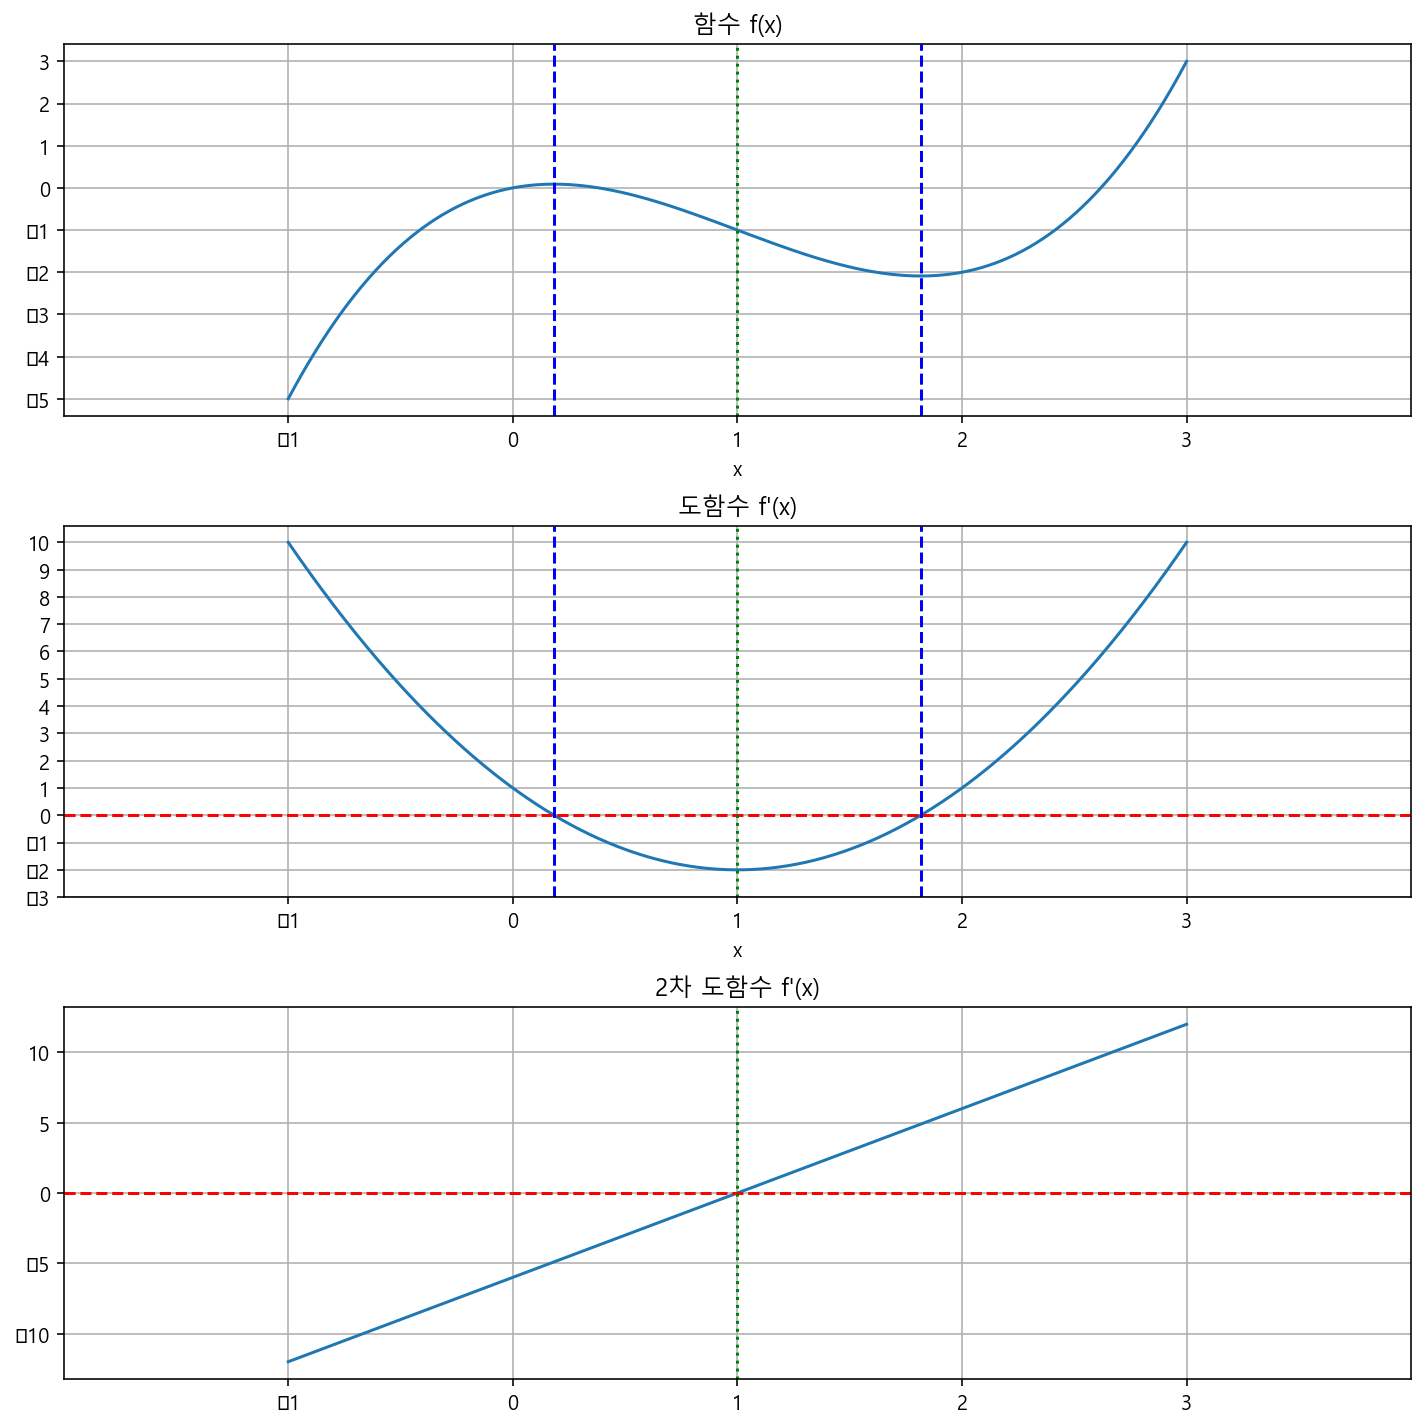

In [39]:
def fprime2(x):
    return 6*x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('함수 f(x)')
plt.xlabel('x')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")
plt.grid()

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("도함수 f'(x)")
plt.xlabel('x')
plt.axhline(0, c='r', ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")
plt.grid()

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("2차 도함수 f'(x)")
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c="g", ls=":")
plt.grid()

plt.tight_layout()
plt.show()

위 그래프를 통해 도함수의 $x$값이 -1 ~ 1에 위치하는 동안 기울기는 감소하고 있기에 2차 도함수값이 음수인것을 확인할 수 있다.

## 편미분

어떤 함수가 둘 이상의 독립변수를 가지는 다변수함수인 경우 미분이 가능한데 이 때는 기울기를 하나의 변수에 대해서 구하는 것이 가능하다. 이를 편미분이라 한다.

즉, 어떤 변수를 기준으로 미분하느냐에 따라 하나의 함수에서 여러 도함수가 도출될 수 있다.

도함수의 표시 방법은 다음과 같다.

\begin{align}
f_x(x,y) = \dfrac{\partial f}{\partial x}
\end{align}

\begin{align}
f_y(x,y) = \dfrac{\partial f}{\partial y} 
\end{align}

이처럼 함수 f에 대한 입력변수가 x, y 두개인 경우 도함수 또한 두개가 도출된다.

편미분을 할 때 미분을 진행할 변수를 제외하면 다른 변수는 상수로 취급한다는 점에 유의하면 된다.

**편미분의 에시**

\begin{align}
f(x,y) = x^2 + 4xy + 4y^2
\end{align}

\begin{align}
f_x(x,y) = \dfrac{\partial f}{\partial x} = 2x + 4y
\end{align}

\begin{align}
f_y(x,y) = \dfrac{\partial f}{\partial y} = 4x + 8y
\end{align}

## 심파이

심파이는 심볼릭 연산을 지원하는 파이썬 패키지로 사람이 실제 계산하는 미분/적분과 동일한 형태의 연산을 지원한다.

In [40]:
import sympy

# Jupyter Notebook에서 수학식의 LaTeX 표현을 위해 필요
sympy.init_printing(use_latex='mathjax')

In [41]:
# 변수(심볼)정의

x = sympy.symbols('x')
x

x

In [42]:
type(x)

sympy.core.symbol.Symbol

In [43]:
# 함수 정의

f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [44]:
# diff() 함수로 미분, simplify()함수로 소인수 분해등을 통한 수식 정리

sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [45]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

## 심파이를 이용한 편미분

In [46]:
# 여러 심볼 정의

x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [47]:
# x로 편미분

sympy.diff(f, x)

2⋅x + 4⋅y

In [48]:
# y로 편미분

sympy.diff(f, y)

4⋅x + 8⋅y

상수 심볼을 포함하는 함수를 미분하는 경우, 심파이는 어떤 심볼이 상수이고 어떤 심볼이 변수인지 알 수 없기 때문에 편미분인 것처럼 입력 변수를 지정해야 한다.

In [49]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [50]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [52]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

In [53]:
# 2차 도함수

sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

## 연습문제

\begin{align}
f(x) = x^3 - 1
\end{align}



In [57]:
x = sympy.symbols('x')
f = x**3 - 1
sympy.diff(f)

   2
3⋅x 

\begin{align}
f(x) = \log (x^{2}-3k)
\end{align}

In [61]:
x, k = sympy.symbols('x k')
f = sympy.log(x**2 - 3*k)
sympy.diff(f, x)

   2⋅x   
─────────
        2
-3⋅k + x 

\begin{align}
f(x) =\exp({ax^b})
\end{align}

In [60]:
a, x, b = sympy.symbols('a x b')
f = sympy.exp(a * x ** b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

다음 함수에 대한 1, 2 차 편미분을 구하라

\begin{align}
f(x, y) = \exp{(x^2 + 2y^2)}
\end{align}

In [62]:
x, y = sympy.symbols('x y')
f = sympy.exp(x**2 + 2 * y ** 2)

sympy.diff(f, x)

      2      2
     x  + 2⋅y 
2⋅x⋅ℯ         

In [63]:
sympy.diff(f, y)

      2      2
     x  + 2⋅y 
4⋅y⋅ℯ         

In [64]:
sympy.diff(f, x, x)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
2⋅⎝2⋅x  + 1⎠⋅ℯ         

In [65]:
sympy.diff(f, x, y)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [66]:
sympy.diff(f, y, y)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
4⋅⎝4⋅y  + 1⎠⋅ℯ         

In [67]:
sympy.diff(f, y, x)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         